# KNN Algorithm

In [1]:
import numpy as np


In [3]:
a = np.asarray([1,2,3])
b = np.asarray([2,0,4])

np.sum((b-a)**2)**0.5  #l2 distance

2.449489742783178

In [4]:
#L1 distance 
np.sum(abs(b-a))

4

Preparing Data

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
mean1 = [1,0]
cov1 = [[1,0.1], [0.1,2]]

dist1 = np.random.multivariate_normal(mean1, cov1, 500)
print(dist1.shape)

mean2 = [4,5]
cov2 = [[1,0.1],[0.1,2]]
dist2 = np.random.multivariate_normal(mean2, cov2, 500)
print(dist2.shape)

(500, 2)
(500, 2)


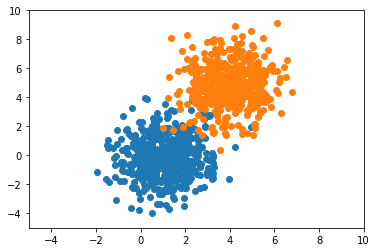

In [10]:
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist1[:,0], dist1[:,1])
plt.scatter(dist2[:,0], dist2[:,1])

In [12]:
data = np.zeros((1000,3))

In [14]:
#distribution of data with dista1 and dist2
data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:,-1] = 1

In [15]:
data.shape

(1000, 3)

In [17]:
data.mean(axis = 0)

array([2.49262456, 2.38323333, 0.5       ])

In [18]:
np.random.shuffle(data)

In [19]:
data[:10]

array([[ 3.82389919,  4.91471746,  1.        ],
       [ 2.88509515,  4.50023686,  1.        ],
       [ 0.71223524, -0.5018033 ,  0.        ],
       [ 2.92468611,  3.97125029,  1.        ],
       [ 5.54684695,  6.86573054,  1.        ],
       [ 0.88496666, -1.7252285 ,  0.        ],
       [ 0.75889952, -0.21154802,  0.        ],
       [ 3.16355629, -0.21349829,  0.        ],
       [ 1.39172226,  0.13360935,  0.        ],
       [ 4.35754105,  4.80146857,  1.        ]])

KNN Algo 

In [20]:
def distance(a,b):
    return np.sum((b-a)**2)**0.5

In [ ]:
def knn(x_train , y_train , test_point, k=7):
    vals = []
    m = x_train.shape[0]
    for i in range(m):
        d = distance(test_point, x_train[i])
        vals.append([d,y_train[i]])
    sorted_vals = sorted(vals, key = lambda r:r[0])
    neighbours  = np.asarray(sorted_vals)[:k, -1]
    
    print(neighbours)
    
    freq = np.unique(neighbours,return_counts=True)
    index = freq[1].argmax()
    return freq[0][inde]